In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('P&D_ESTAG_G_01_Q6.csv', sep=';')
data.head(15)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [3]:
data.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [4]:
data.IPTU.fillna(data.IPTU.std(), inplace=True)
data.Condominio.fillna(data.Condominio.std(), inplace=True)
data.Valor.fillna(data.Valor.std(), inplace=True)
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.000000,60.000000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,39184.959615,179564.062897
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000
3,Apartamento,Centro,1,0,0,15,800.0,390.000000,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.000000,179564.062897
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.000000,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.000000,37.000000
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.000000,179564.062897


In [5]:
data.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [6]:
data.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.296000e+04,3.296000e+04,3.296000e+04
mean,1.771390,1.749059,0.665777,231.901547,1.329027e+04,6.957531e+03,5.740060e+04
std,1.717869,20.380402,1.176525,1135.254152,6.675153e+05,3.862703e+04,1.701534e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,6.300000e+02,1.650000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,1.160000e+03,6.065000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,2.780000e+03,1.795641e+05
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [7]:
col='Valor'
data.sort_values(by=col)
tam = data[col].count()
q1 = data[col].quantile(q=0.25, interpolation='linear')
q3 = data[col].quantile(q=0.75, interpolation ='linear')
ini = round(int(tam/q1))
final = int(tam-ini)
ini_line = data[col].loc[ini]
final_line = data[col].loc[final]
bigger = (int(final_line - ini_line) * 1.5) - ini
lowest = (int(final_line - ini_line) * 1.5) + final

data = data[(data[col] < lowest)]
data = data[(data[col] > bigger)]

data.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,31645.000000,31645.000000,31645.000000,31645.000000,31645.000000,3.164500e+04,31645.000000
mean,1.819877,1.392100,0.679444,156.585622,4832.320398,6.091986e+03,55528.727152
std,1.515576,20.117136,1.170767,517.918379,5576.775065,3.889686e+04,82413.868316
min,0.000000,0.000000,0.000000,0.000000,75.000000,1.000000e+00,1.000000
25%,0.000000,0.000000,0.000000,53.000000,1400.000000,6.100000e+02,156.000000
50%,2.000000,1.000000,0.000000,84.000000,2600.000000,1.100000e+03,544.000000
75%,3.000000,2.000000,1.000000,155.000000,5900.000000,2.400000e+03,179564.062897
max,32.000000,1966.000000,70.000000,42000.000000,31450.000000,6.552570e+06,450625.000000


In [8]:
grouped = data.groupby(['Bairro'])
grouped.std()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Bairro,,,,,,,
Abolição,0.902138,0.800433,0.000000,208.921535,1843.448444,19877.613271,76953.259420
Alto da Boa Vista,2.690371,2.794553,1.345185,766.224510,11052.251441,14484.807179,87525.109036
Anchieta,0.996205,14.317557,0.000000,2092.720216,5836.000862,11288.918155,81101.026746
Andaraí,0.854356,0.632223,0.480135,138.661919,2313.883539,12209.103674,84870.101086
Anil,1.315908,2.092291,0.863515,278.777245,4738.168885,16486.363178,87489.236405
...,...,...,...,...,...,...,...
Vila Valqueire,1.105218,2.645862,0.669970,88.448504,2826.698576,18533.077352,88869.876953
Vila da Penha,1.079743,1.177150,0.476509,209.116352,2403.356575,18729.419221,71190.789378
Vista Alegre,0.610159,0.590326,0.213201,20.824613,273.239742,18574.046877,38133.946340


In [9]:
import matplotlib.pyplot as plt

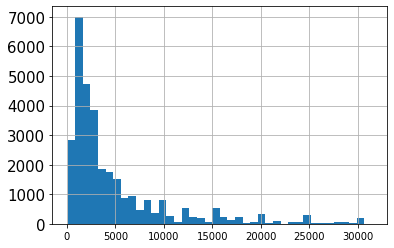

In [10]:
data.Valor.hist(bins=40, xlabelsize=10, ylabelsize=15)
plt.show();

In [11]:
#bairros com maior número de registros (ou seja, disponibildiade de aluguel), segundo nossa base de dados
aux = data.Bairro.value_counts()
aux = aux[aux > 1000]
aux

Barra da Tijuca             6045
Copacabana                  3165
Centro                      2856
Ipanema                     2169
Recreio dos Bandeirantes    2116
Leblon                      1419
Tijuca                      1346
Botafogo                    1222
Name: Bairro, dtype: int64

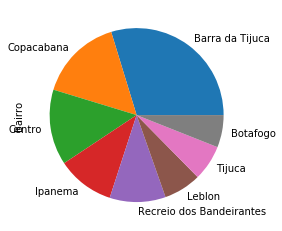

In [12]:
aux.plot.pie();

In [13]:
grouped = data.groupby(['Quartos'])
grouped.median()['Valor']

Quartos
0      2400.0
1      1500.0
2      2000.0
3      3700.0
4      8500.0
5     12500.0
6     15000.0
7     17000.0
8     15000.0
9      9500.0
10    23500.0
11    12000.0
12    17500.0
14     7250.0
22    30000.0
23     1480.0
27    12000.0
32     4000.0
Name: Valor, dtype: float64

In [14]:
grouped = data.groupby(['Suites'])
grouped.median()['Valor']

Suites
0      1800.0
1      3200.0
2      6000.0
3      8000.0
4     12000.0
5     18000.0
6     20000.0
7     18950.0
10    15000.0
12    17000.0
14     9500.0
23     1480.0
60     2100.0
70     1200.0
Name: Valor, dtype: float64

In [15]:
import seaborn as sns

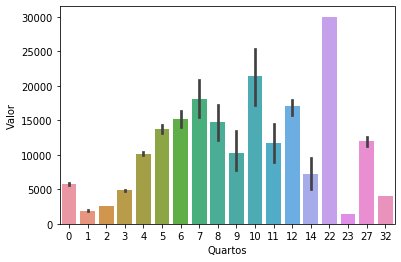

In [16]:
sns.barplot(x='Quartos', y="Valor", data=data);

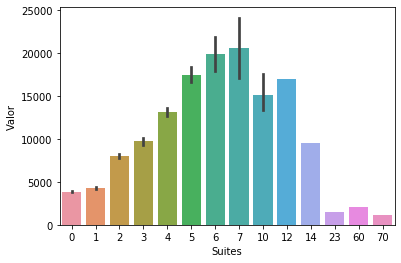

In [17]:
sns.barplot(x='Suites', y="Valor", data=data);

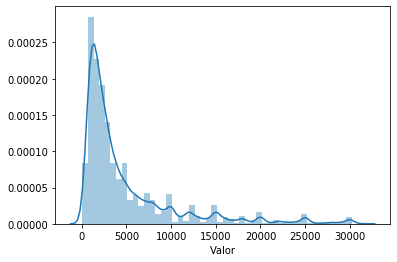

In [18]:
#melhorando um pouco nosso histograma de ditribuição de valores anterior e acrescentando um kde 
#que simula, de forma um pouco mais contundente, a realidade
sns.distplot(data.Valor);

In [19]:
aux = data.sort_values(by=['Area'])
aux = aux[aux.Area < 5000]
aux.Area

7446        0
9309        0
16518       0
3605        0
21689       0
         ... 
6075     4500
32396    4580
12696    4752
24181    4800
16116    4900
Name: Area, Length: 31616, dtype: int64

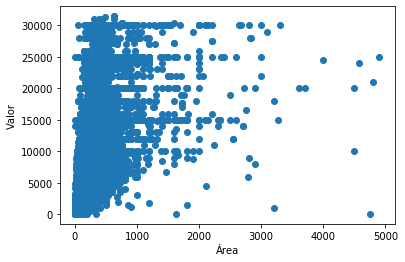

In [20]:
plt.xlabel("Área")
plt.ylabel("Valor")
plt.scatter(x='Area', y='Valor', data=aux);

In [23]:
import numpy as np

In [36]:
#analizando o valor médio por quartil da area (menor que 5000) - para terminar
col = 'Area'
q1 = aux[col].quantile(q=0.25, interpolation='linear')
q2 = aux[col].quantile(q=0.5, interpolation='linear')
q3 = aux[col].quantile(q=0.75, interpolation ='linear')
q4 = aux[col].max()
qn = np.array([q1, q2, q3, q4], dtype='float64')
aux[col].describe()

count    31616.000000
mean       145.347293
std        212.423010
min          0.000000
25%         53.000000
50%         84.000000
75%        155.000000
max       4900.000000
Name: Area, dtype: float64